# The Sunyaev-Zeldovich signal for a single pointing

## Thermal and kinematic effect

Now having the scattering kernel for a population of electrons, we can simulate the SZ signal along a single line-of-sight. For this, we convolve the background intensity from the CMB with the scattering kernel. The convolution happens over $s$.

We first show the spectral distortion arising from a thermal Maxwellian electron population. Note that we also generate the CMBR because we want to plot specifically the SZ distortion. `MockSZ` generates the distortion of the cluster on top of the CMB, so to get the total intensity (including CMB), one has to add this on top.

We also plot the kinematic SZ effect, arising from peculiar motion of the cluster with respect to the Hubble flow.

[5.91830424e+07 1.77549127e+08 5.32647382e+08]


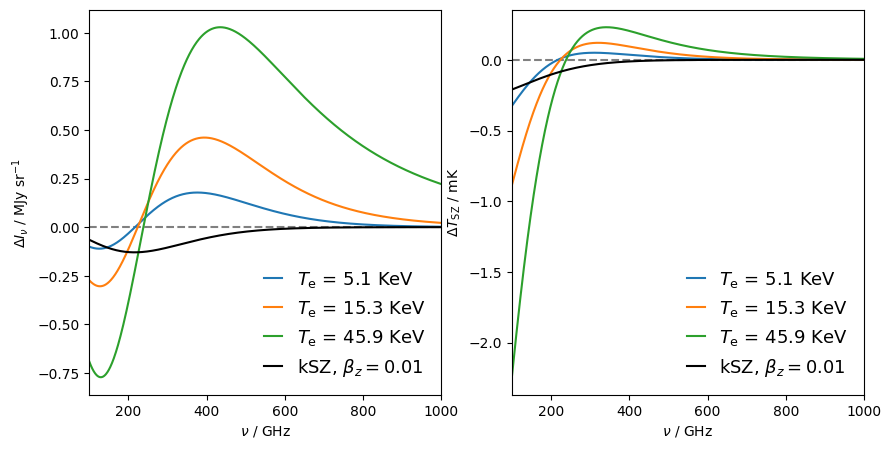

In [7]:
import matplotlib
import os

import numpy as np
import matplotlib.pyplot as pt
import scipy.optimize as opt

import MockSZ.SinglePointing as MSPointing
import MockSZ.Conversions as MConv

%matplotlib inline

eV_arr = np.array([5.1, 15.3, 45.9]) * 1e3

Te = MConv.eV_Temp(eV_arr)
print(Te)
tau_e = 0.01
num_arr = 1000
nu = np.linspace(100, 1000, num=num_arr) * 1e9
nu_plot = nu * 1e-9

beta_z = 0.01

fig, ax = pt.subplots(1,2, figsize=(10, 5))

xmin = []
x0 = []
xmax =[]
for i in range(3):
    SZ = MSPointing.getSpecIntensityRM(nu, Te[i], tau_e)
    SZ_MJy = MConv.SI_JySr(SZ) * 1e-6
    SZ_mK = MConv.SI_Temp(SZ, nu) * 1e3
    
    label = r"$T_\mathrm{e}$" + f" = {eV_arr[i] * 1e-3:.1f} KeV"
    
    ax[0].plot(nu_plot, SZ_MJy, label=label)
    ax[1].plot(nu_plot, SZ_mK, label=label)

    xmin.append(MConv.freq_x(nu[np.argmin(SZ)]))
    xmax.append(MConv.freq_x(nu[np.argmax(SZ)]))
    x0.append(MConv.freq_x(nu[np.argmin(np.absolute(SZ))]))

xmin = np.array(xmin)
xmax = np.array(xmax)
x0 = np.array(x0)

kSZ = MSPointing.getSpecIntensityKSZ(nu, beta_z, tau_e)
kSZ_MJy = MConv.SI_JySr(kSZ * 1e-6)
kSZ_mK = MConv.SI_Temp(kSZ * 1e3, nu)

label = r"kSZ, $\beta_z={:.2f}$".format(beta_z)
    
ax[0].plot(nu_plot, kSZ_MJy, color="black", label=label)
ax[1].plot(nu_plot, kSZ_mK, color="black", label=label)

ax[0].axhline(y=0, zorder=0, color="grey", ls="dashed")
ax[0].set_xlim(100, 1000)

ax[0].set_ylabel(r"$\Delta I_\nu$ / MJy sr$^{-1}$")
ax[0].set_xlabel(r"$\nu$ / GHz")

ax[0].legend(frameon=False, prop={'size': 13},handlelength=1)

ax[1].axhline(y=0, zorder=0, color="grey", ls="dashed")
ax[1].set_xlim(100, 1000)

ax[1].set_ylabel(r"$\Delta T_\mathrm{SZ}$ / mK")
ax[1].set_xlabel(r"$\nu$ / GHz")
ax[1].legend(frameon=False, prop={'size': 13},handlelength=1)

pt.show()

We plot the SZ signal for three different $T_\mathrm{e}$. For each $T_\mathrm{e}$, we plot the signal with $\tau_\mathrm{e}=1$ as solid lines. In addition to the intensity in MJy per steradian, we also give the brightness temperature difference $\Delta T_\mathrm{SZ}$.

Note that sometimes, authors plot the intensities normalised by the Compton-$y$ factor. Since these are equivalent to dividing by $T_\mathrm{e}$, the relatove shapes change. `MockSZ` does not do this: the intensities are as-is.

It is evident that the general relativistic treatment we followed deviates from the conventional approach, which involves the Kompaneets equation. For example, in the Kompaneets equation, the null around $\nu \approx 218$ GHz is independent of $T_\mathrm{e}$. For our case, this does seem to be the case. The Kompaneets equation is derived by solving a non-relativistic diffusion equation and therefore not that accurate for hot gases. That is why, for increasing $T_\mathrm{e}$, our solution deviates increasingly from the Kompaneets solution.

## Validation of thermal and kinematic effect

In order to check how correct our calculation is, we calculate the dimensionless frequencies $x = \frac{h \nu}{k_\mathrm{B} T_\mathrm{CMB}}$ associated with the minima, zero and maxima of our SZ signals. These should follow a linear relation for $T_\mathrm{e}$ < 20 KeV, given by [Birkinshaw, 1991](https://ned.ipac.caltech.edu/level5/Birkinshaw/Birk3_4.html), as function of dimensionless temperature $\Theta = \frac{k_\mathrm{B} T_\mathrm{e}}{m_\mathrm{e} c^2}$.

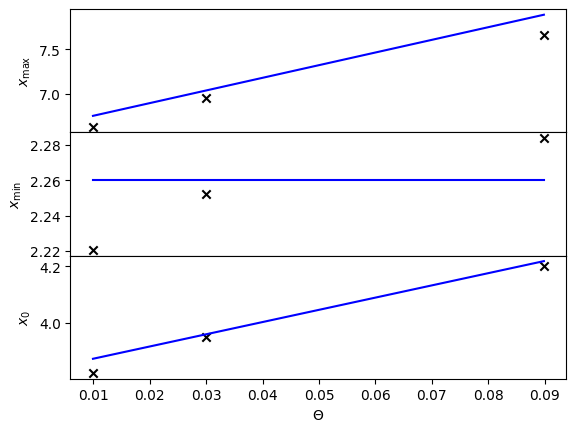

*** FRACTIONAL ERRORS (%) ***
Te[KeV]:  5.1  15.3  45.9
xmax   :  1.8  1.3   2.9
xmin   :  1.8  0.3   1.0
x0     :  1.3  0.3   0.4


In [8]:
theta = MConv.Te_theta(Te)

theta_test = np.linspace(theta[0],theta[-1],num=num_arr)

xmax_theo = 6.61 * (1 + 2.15*theta_test)
xmin_theo = 2.26 * np.ones(num_arr)
x0_theo = 3.83 * (1 + 1.13*theta_test)

fig, ax = pt.subplots(3,1, sharex=True, gridspec_kw={"hspace":0})
ax[0].scatter(theta, xmax, c="k", marker="x")
ax[0].plot(theta_test, xmax_theo, c="b")
ax[0].set_ylabel(r"$x_\mathrm{max}$")

ax[1].scatter(theta, xmin, c="k", marker="x")
ax[1].plot(theta_test, xmin_theo, c="b")
ax[1].set_ylabel(r"$x_\mathrm{min}$")

ax[2].scatter(theta, x0, c="k", marker="x")
ax[2].plot(theta_test, x0_theo, c="b")
ax[2].set_ylabel(r"$x_0$")

ax[2].set_xlabel(r"$\Theta$")

pt.show()

errs_max = np.absolute(6.61 * (1 + 2.15*theta) - xmax) / xmax * 100
errs_min = np.absolute(2.26 - xmin)/ xmin * 100
errs_0 = np.absolute(3.83 * (1 + 1.13*theta) - x0) / x0 * 100

print("*** FRACTIONAL ERRORS (%) ***")
print("Te[KeV]:  5.1  15.3  45.9")
print(f"xmax   :  {errs_max[0]:.1f}  {errs_max[1]:.1f}   {errs_max[2]:.1f}")
print(f"xmin   :  {errs_min[0]:.1f}  {errs_min[1]:.1f}   {errs_min[2]:.1f}")
print(f"x0     :  {errs_0[0]:.1f}  {errs_0[1]:.1f}   {errs_0[2]:.1f}")

As can be seen, the fractional percentage errors are small, especially for $x_0$. The errors are largest for $T_\mathrm{e}=45.9$ KeV, which is outside of the linear regime. This is a nice check on the correctness of the calculation.

Another check we can perform is a comparison to an established SZ simulator, namely [`SZpack`](https://www.jb.man.ac.uk/~jchluba/Science/SZpack/SZpack.html). We generate a signal using `MockSZ` and run the same simulation using `SZpack` with the same parameters. We can then compare the two simulations. Because `SZpack` uses the dimensionless frequency $x$, we have to first convert from $x$ to $\nu$, the frequency in Hertz. Also, since `SZpack` uses a logarithmic frequency spacing, we pass the `log_nu` flag as `True` to the specific intensity functions. This forces `MockSZ` to generate the frequencies on a $\log_{10}$ grid, with the exponents evenly spaced.

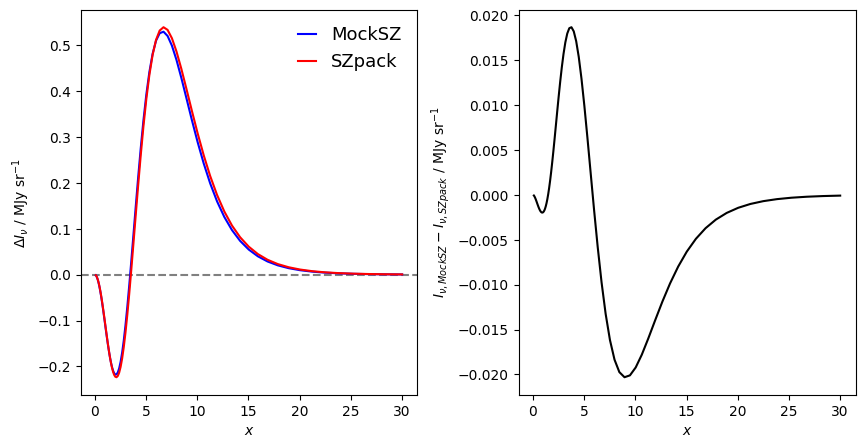

In [9]:
# Generate cluster in MockSZ
xmin = 0.1                                                                                
xmax = 30                                                                                 
npts = 100                                                                                
                                                                                          
tau_e = 0.01                                                                              
Te = MConv.eV_Temp(15.33e3)                                                               
beta_z = -0.01                                                                            
x_mock = np.logspace(np.log10(xmin), np.log10(xmax), npts)                               
nu_test = MConv.x_freq(x_mock)                                                                
                                                                                          
I_tSZ = MSPointing.getSpecIntensityRM(nu_test, Te, tau_e, log_nu=True)                            
I_kSZ = MSPointing.getSpecIntensityKSZ(nu_test, beta_z, tau_e, log_nu=True)                       
                                                                                          
I_mock = MConv.SI_JySr(I_tSZ + I_kSZ) * 1e-6

# Read cluster simulated with SZpack        
name = os.path.join("resources", "SZ_Integral.5D.dat")

x_pack = []                                                                                    
I_pack = []                                                                                   
with open(name, "r") as file:                                                             
    for line in file:                                                                     
        if line[0] == "#":                                                                
            continue                                                                      
        line = [float(x) for x in line.split(" ")]                                        
                                                                                          
        x_pack.append(line[0])                                                                 
        I_pack.append(line[-1])                                                      
                                                                                          
fig, ax = pt.subplots(1,2, figsize=(10,5), gridspec_kw={"wspace":0.3})                                                
ax[0].plot(x_mock, I_mock, color="blue", label="MockSZ")                                                                
ax[0].plot(x_pack, I_pack, color="red", label="SZpack")   
ax[0].axhline(y=0, zorder=0, color="grey", ls="dashed")
ax[0].legend(frameon=False, prop={'size': 13},handlelength=1)
ax[0].set_xlabel("$x$")
ax[0].set_ylabel(r"$\Delta I_\nu$ / MJy sr$^{-1}$")

err_norm = (I_mock - I_pack)                                                              
                                                                                          
ax[1].plot(x_mock, err_norm, color="black")      
ax[1].set_ylabel(r"$I_{\nu,MockSZ}-I_{\nu,SZpack}$ / MJy sr$^{-1}$")
ax[1].set_xlabel("$x$")
pt.show()

## Non-thermal effect

We also plot the single-pointing curves for the powerlaw distribution of electrons. It is clearly visible that, due to the enhanced upshifting tail of the powerlaw scattering kernel, the high energy tail is a lot longer. Also, the dip before 218 GHz is significantly deeper. 

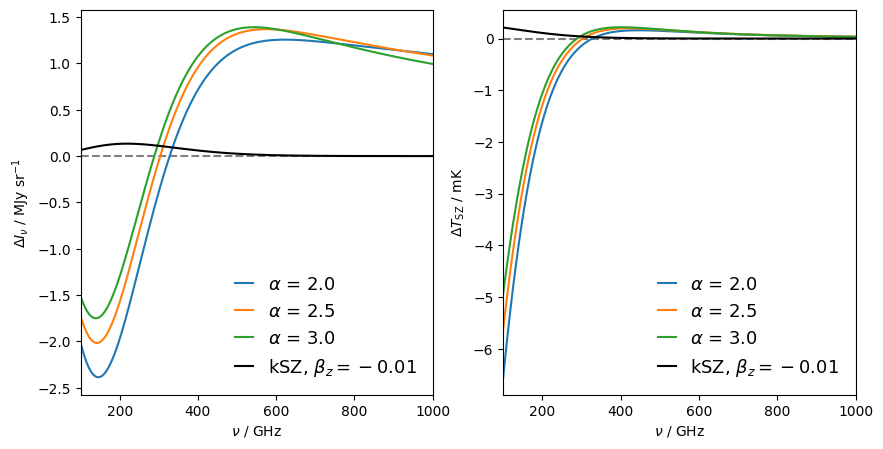

In [10]:
alpha = np.array([2, 2.5, 3])

fig, ax = pt.subplots(1,2, figsize=(10, 5))
for i in range(3):
    SZ = MSPointing.getSpecIntensityPL(nu, alpha[i], tau_e)
    SZ_MJy = MConv.SI_JySr(SZ) * 1e-6
    SZ_mK = MConv.SI_Temp(SZ, nu) * 1e3
    
    label = r"$\alpha$" + f" = {alpha[i]:.1f}"
    
    ax[0].plot(nu_plot, SZ_MJy, label=label)
    ax[1].plot(nu_plot, SZ_mK, label=label)

kSZ = MSPointing.getSpecIntensityKSZ(nu, beta_z, tau_e)
kSZ_MJy = MConv.SI_JySr(kSZ * 1e-6)
kSZ_mK = MConv.SI_Temp(kSZ * 1e3, nu)

label = r"kSZ, $\beta_z={:.2f}$".format(beta_z)
    
ax[0].plot(nu_plot, kSZ_MJy, color="black", label=label)
ax[1].plot(nu_plot, kSZ_mK, color="black", label=label)
    
ax[0].axhline(y=0, zorder=0, color="grey", ls="dashed")
ax[0].set_xlim(100, 1000)

ax[0].set_ylabel(r"$\Delta I_\nu$ / MJy sr$^{-1}$")
ax[0].set_xlabel(r"$\nu$ / GHz")

ax[0].legend(frameon=False, prop={'size': 13},handlelength=1)

ax[1].axhline(y=0, zorder=0, color="grey", ls="dashed")
ax[1].set_xlim(100, 1000)

ax[1].set_ylabel(r"$\Delta T_\mathrm{SZ}$ / mK")
ax[1].set_xlabel(r"$\nu$ / GHz")
ax[1].legend(frameon=False, prop={'size': 13},handlelength=1)

pt.show()